In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importo los archivos csv                      
google=pd.read_csv('https://raw.githubusercontent.com/LedesmaFran/python/master/GOOGLE.csv')
amazon=pd.read_csv('https://raw.githubusercontent.com/LedesmaFran/python/master/AMZN.csv')


In [3]:
#ingrese fecha inicial y fecha final del intervalo de interés con el siguiente formato YYYY-MM-DD

a='2015-11-06' #fecha inicial
b='2019-11-10' #fecha final

#me quedo con las fechas de las acciones solicitadas
pru_ama=amazon[(amazon['Date']>= a) & (amazon['Date']<=b)]
pru_goo=google[(google['Date']>= a) & (google['Date']<=b)]


#obtengo la posición de la fecha inicial elegida para utilizarla después
pos_a = amazon[amazon['Date']==a].index.values.astype(int)
pos_a=int(pos_a)

print(pru_ama)
print(pru_goo)


            Date         Open         High          Low        Close  \
1512  2015-11-06   655.000000   662.260010   652.000000   659.369995   
1513  2015-11-09   658.650024   661.960022   647.849976   655.489990   
1514  2015-11-10   651.010010   660.000000   647.260010   659.679993   
1515  2015-11-11   663.250000   675.960022   663.250000   673.250000   
1516  2015-11-12   673.000000   675.640015   664.219971   665.599976   
...          ...          ...          ...          ...          ...   
2511  2019-10-28  1748.060059  1778.699951  1742.500000  1777.079956   
2512  2019-10-29  1774.810059  1777.000000  1755.810059  1762.709961   
2513  2019-10-30  1760.239990  1782.380005  1759.119995  1779.989990   
2514  2019-10-31  1775.989990  1792.000000  1771.479980  1776.660034   
2515  2019-11-01  1788.010010  1797.449951  1785.209961  1791.439941   

        Adj Close   Volume  
1512   659.369995  4092200  
1513   655.489990  4048800  
1514   659.679993  3489500  
1515   673.250000  

In [4]:
#creo un nuevo data frame con columnas 'Date', 'Amazon' y 'Google'. 
#las filas de las columnas son las seleccionadas entre fecha inicial y final 

closeAG = pd.DataFrame(columns=['Date', 'Amazon', 'Google'])
closeAG['Date']=pru_ama['Date']
closeAG['Amazon']=pru_ama['Close']
closeAG['Google']=pru_goo['Close']




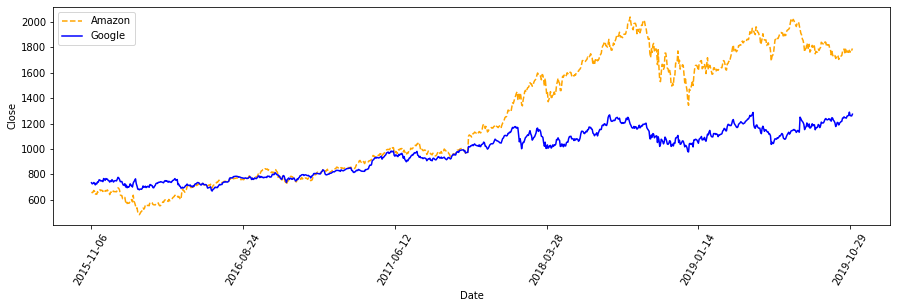

In [17]:
ax=plt.gca()
closeAG.plot(x='Date',y='Amazon',color='orange',linestyle='--',figsize=(15,4),ax=ax)
closeAG.plot(x='Date',y='Google',color='blue',linestyle='-',ax=ax)
plt.xticks(rotation=60)
plt.ylabel('Close')
plt.show()

In [22]:
#convierto las columnas de ClosAG en listas auxiliares para encontrar las intersecciones

dat = closeAG['Date'].to_numpy()
ama= closeAG['Amazon'].to_numpy()
goo= closeAG['Google'].to_numpy()



In [25]:
#las intersecciones se producen cuando una empresa gana en una fecha y en la siguiente pierde
#considero Amazon y encuentro las fechas donde:
# 1) PIERDE en una fecha y en la siguiente GANA : indices APG
# 2) GANA en una fecha y en la siguiente PIERDE : indices AGP


# 1) PIERDE en una fecha y en la siguiente GANA : indices APG
indicesAPG = []
for i in range(len(ama)-1):
    if (ama[i] < goo[i])&((ama[i+1] > goo[i+1])):
        indicesAPG.append(i)
        
# 2) GANA en una fecha y en la siguiente PIERDE : indices AGP

indicesAGP = []
for i in range(len(ama)-1):
    if (ama[i] > goo[i])&((ama[i+1] < goo[i+1])):
        indicesAGP.append(i)



In [26]:
#junto ambos indices y los ordeno

cruces_graficas=indicesAGP + indicesAPG 
cruces_graficas.sort()

#acomodo los indices respecto de los indices originales de los data frames 

cruces_originales = [x+pos_a for x in cruces_graficas]
print(cruces_originales)



[1639, 1640, 1654, 1657, 1661, 1662, 1663, 1689, 1692, 1693, 1716, 1725, 1727, 1757, 1758, 1760, 1761, 1762, 1763, 1764, 1773, 1777, 1783, 1784, 1808, 1814, 1816, 1990, 1991, 2003, 2005, 2006, 2008]


In [28]:
#en el data frame que me hice, creo una columna vacía donde voy a poner los valores de las intersecciones

closeAG['Intersec']=np.NaN

# completo la columna en las filas de los indices obtenidos

for i in range(len(ama)-1):
    if (i in cruces_graficas):
        closeAG.iloc[i, closeAG.columns.get_loc('Intersec')]=closeAG.iloc[i, closeAG.columns.get_loc('Amazon')]    

print(closeAG)



            Date       Amazon       Google  Intersec
1512  2015-11-06   659.369995   733.760010       NaN
1513  2015-11-09   655.489990   724.890015       NaN
1514  2015-11-10   659.679993   728.320007       NaN
1515  2015-11-11   673.250000   735.400024       NaN
1516  2015-11-12   665.599976   731.229980       NaN
...          ...          ...          ...       ...
2511  2019-10-28  1777.079956  1290.000000       NaN
2512  2019-10-29  1762.709961  1262.619995       NaN
2513  2019-10-30  1779.989990  1261.290039       NaN
2514  2019-10-31  1776.660034  1260.109985       NaN
2515  2019-11-01  1791.439941  1273.739990       NaN

[1004 rows x 4 columns]


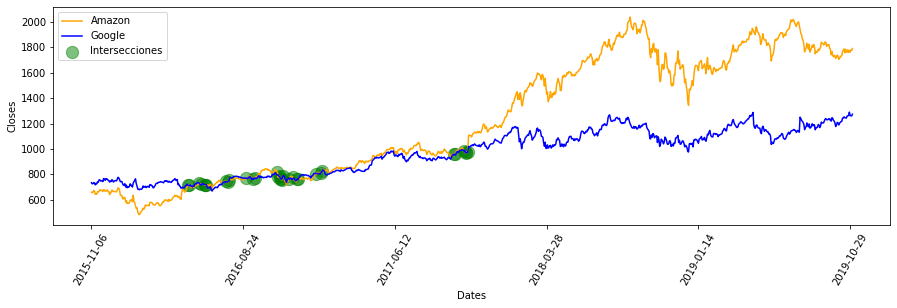

In [191]:
ax=plt.gca()
closeAG.plot(x='Date',y='Amazon',color='orange',figsize=(15,4),ax=ax)
closeAG.plot(x='Date',y='Google',color='blue',ax=ax)
closeAG.plot.scatter(x='Date',y='Intersec',color='green',alpha=0.5,label='Intersecciones',ax=ax,s=150)



plt.xlabel('Dates')
plt.ylabel('Closes')
plt.xticks(rotation=60)




plt.show()

In [203]:
cruces_originales = [x+pos_a for x in cruces_graficas]

#estos cruces originales traducidos a fechas

fechas_cruces=aver[cruces_graficas]
print(fechas_cruces)

#la componente y de cada fecha
ama_cruces=ama[cruces_graficas]

#fc_ac=list(zip(fechas_cruces,ama_cruces))


print(fc_ac)


['2016-05-11' '2016-05-12' '2016-06-02' '2016-06-07' '2016-06-13'
 '2016-06-14' '2016-06-15' '2016-07-22' '2016-07-27' '2016-07-28'
 '2016-08-30' '2016-09-13' '2016-09-15' '2016-10-27' '2016-10-28'
 '2016-11-01' '2016-11-02' '2016-11-03' '2016-11-04' '2016-11-07'
 '2016-11-18' '2016-11-25' '2016-12-05' '2016-12-06' '2017-01-11'
 '2017-01-20' '2017-01-24' '2017-10-02' '2017-10-03' '2017-10-19'
 '2017-10-23' '2017-10-24' '2017-10-26']
[('2016-05-11', 713.22998), ('2016-05-12', 717.929993), ('2016-06-02', 728.23999), ('2016-06-07', 723.73999), ('2016-06-13', 715.23999), ('2016-06-14', 719.299988), ('2016-06-15', 714.26001), ('2016-07-22', 744.8599849999999), ('2016-07-27', 736.669983), ('2016-07-28', 752.6099849999999), ('2016-08-30', 767.580017), ('2016-09-13', 761.01001), ('2016-09-15', 769.6900019999999), ('2016-10-27', 818.3599849999999), ('2016-10-28', 776.320007), ('2016-11-01', 785.409973), ('2016-11-02', 765.5599980000001), ('2016-11-03', 767.030029), ('2016-11-04', 755.049988), (

In [205]:
################################# Se exporta a Excel
import xlsxwriter

workbook = xlsxwriter.Workbook('intersecciones_Amazon_vs_Google.xlsx')
worksheet = workbook.add_worksheet()

array = [fechas_cruces,ama_cruces]

row = 0

for col, data in enumerate(array):
    worksheet.write_column(row, col, data)

workbook.close()

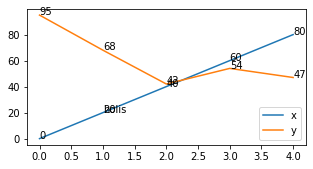

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame({'x':range(0, 100, 20),
                   'y':np.random.randint(0,100,5)})

rows, cols = df.shape
fig, ax = plt.subplots(figsize=(50/10,25/10))
df.plot(ax=ax)

for col in range(cols):
    for i in range(rows):
        ax.annotate('{}'.format(df.iloc[i, col]), xy=(i, df.iloc[i, col])) 
        
plt.text(1,20,'holis')


plt.show()

In [190]:

al = closeAG.set_index('Date')['Intersec'].plot(style='o')
def label_point(x, y, val, al):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        al.text(point['x'], point['y'], str(point['val']))

label_point(closeAG.Date, closeAG.Intersec, closeAG.Intersec, al)
draw()

NameError: name 'draw' is not defined

ConversionError: Failed to convert value(s) to axis units: '2015-11-06'

<Figure size 432x288 with 1 Axes>

In [ ]:
#lo que no funco:::::::::::::::::::::::::::::::::::::::::::::::::::::::::

#largo=list(range(pru_ama['Date'].count())) poner esto al crear el Df, pq me ponia NaN las dos primeras filas
#closeAG.reset_index(drop=True)


#::::::::::::::::

 def get_range(df, start, finish):
        return df[start:finish]

print(get_range(closeAG,125,496))


#para saber la posicion/el indice de una entrada
#pos_a = amazon[amazon['Date']==a].index.values.astype(int)